In [1]:
import random
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pylab import rand  

n=20
nx1 = rand(n)
nx2 = rand(n)
xr = zip(nx1*10, nx2*10)
print xr  # X input in the perceptron implementation



[(7.5556969918904446, 3.3458182231349722), (2.2873400843224321, 4.406246486255232), (2.7554348631340053, 0.36812326504482518), (0.36747398396286157, 9.4433072924829258), (0.38342135706818881, 3.2143418491354145), (1.1560782967982641, 7.054155988943033), (4.8122834151227867, 6.3888906562380452), (5.7842388850554709, 9.7406764408661086), (1.0606433510701319, 1.0908569599149098), (7.544537051711572, 4.3656130521454903), (0.85935911224061856, 3.8534591295765406), (2.2231918227849965, 2.9001959233752661), (9.9406572048832125, 9.9240304301340139), (1.1088510212741198, 8.224342886103198), (7.0266097544594963, 8.024268536950105), (3.4285506071032312, 4.8557381783774147), (5.6785394721506943, 2.6226052020325952), (9.0401755997344715, 4.1315822386400649), (9.909287661878027, 4.9881302208120939), (1.1856015661849872, 4.9624077193693585)]


[-1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1]


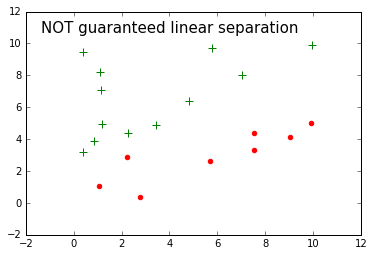

In [4]:
b = []
r = []
y = []

for pair in xr:
    #print pair[1]
    if pair[1] > (0.7*pair[0]+2):
        b.append(pair)
        y.append(1)
    else:
        r.append(pair)
        y.append(-1)
        
#print(xr[0][0])

print y
inputs = []
#for i in range(len(b)+len(r)):
 #   inputs.append([b[i],b[i],1])
  #  inputs.append([r[i],r[i],-1])
    
#print inputs2

plt.scatter([x[0] for x in b], [x[1] for x in b],color='green', marker='+', s=70)
plt.scatter([x[0] for x in r], [x[1] for x in r],color='red', marker='o')
plt.text(4, 11,'NOT guaranteed linear separation', horizontalalignment='center',verticalalignment='center', fontsize=15)
#plt.show()

In [5]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float - NOT USED
        Learning rate (between 0.0 and 1.0)
        n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
            X : {array-like}, shape = [n_samples, n_features]
                Training vectors, where n_samples
                is the number of samples and
                n_features is the number of features.
            y : array-like, shape = [n_samples]
                Target values.
        Returns
        -------
               self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
           
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #print "w ", self.w_, " target ", target, " self.predict(xi) ", self.predict(xi)
                update = self.eta * (target - self.predict(xi))
                #if update != 0.0:
                 #   print "update " , update, "xi ", xi, "w", self.w_
                self.w_[1:] += update * xi
                #print "update " , update, "xi ", xi, "w", self.w_, " update * xi ", update * xi
                self.w_[0] += update
                #print "update " , update, "xi ", xi, "w", self.w_
                errors += int(update != 0.0)
                #print errors
            self.errors_.append(errors)
        return self
        
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    